In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os

In [3]:
# per file
with open("checkpoints_study_2025-03-10_02-34-32/study_details.json") as f:
    data = json.load(f)

In [24]:
# aggregate all files
data = []
for fn in os.listdir('.'):
    if fn.startswith('checkpoints_study_'):
        study_path = os.path.join(fn, "study_details.json")
        if os.path.exists(study_path):
            with open(study_path) as f:
                data.extend(list(json.load(f).values()))

In [26]:
hyperparam_data = []
exclude_keys = ["checkpoint_path", "model_name", "trainable_parameters"]

for val in data:    
    for k in exclude_keys:
        if k in val:
            val.pop(k)
    hyperparam_data.append(val)

In [27]:
# Create DataFrame
df = pd.DataFrame(hyperparam_data)
df

,batch_size,optimizer_type,scheduler_type,weight_decay,learning_rate,h_flip,rotation,best_val_accuracy,T_max,eta_min,factor,patience,num_epochs,momentum,nesterov,step_size,gamma
0,128,SGD,OneCycleLR,0.0001,0.028134,0.431537,24,0.8952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128,Adam,CosineAnnealingLR,0.0005,0.000111,0.972133,1,0.7515,44.0,4.027312e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,256,SGD,ReduceLROnPlateau,0.0005,0.047752,0.577285,15,0.8883,NaN,NaN,0.814281,8.0,NaN,NaN,NaN,NaN,NaN
3,128,Adam,ReduceLROnPlateau,0.0005,0.000463,0.121800,3,NaN,NaN,NaN,0.313229,3.0,NaN,NaN,NaN,NaN,NaN
4,128,SGD,StepLR,NaN,0.018224,0.090928,4,0.4596,NaN,NaN,NaN,NaN,48.0,0.741524,1.0,17.0,0.554703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,128,SGD,CosineAnnealingLR,0.0001,0.019498,0.350603,12,NaN,NaN,5.066086e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,64,Adam,ReduceLROnPlateau,0.0005,0.000103,0.194672,3,NaN,NaN,NaN,0.347543,8.0,NaN,NaN,NaN,NaN,NaN
176,64,Adam,OneCycleLR,0.0001,0.000636,0.376197,21,0.8034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,128,Adam,CosineAnnealingLR,0.0005,0.000904,0.690007,0,0.9122,NaN,2.879473e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Plot hyperparameter vs validation accuracy
def plot_hyperparam_vs_acc(df, hyperparameter_column):
    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(data=df, x=hyperparameter_column, y="best_val_accuracy")
    plt.title(f'{hyperparameter_column} vs Validation Accuracy')
    plt.xlabel(hyperparameter_column)
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

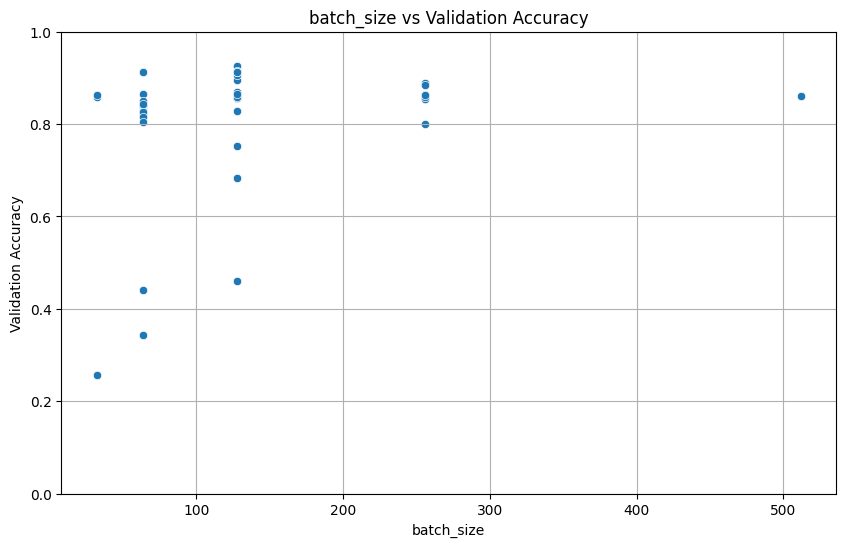

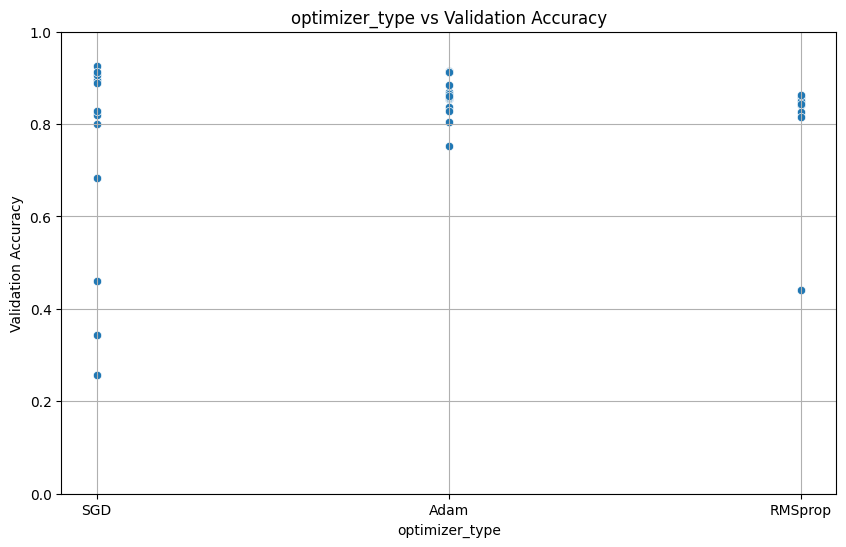

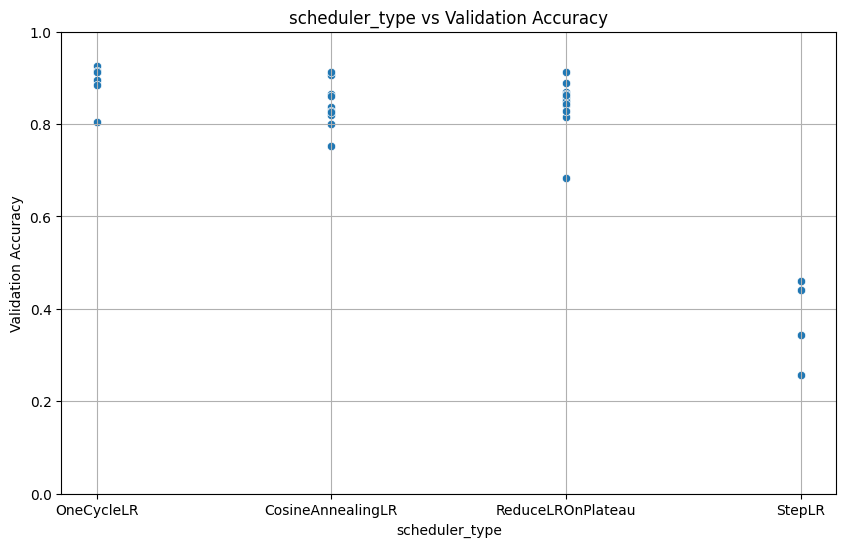

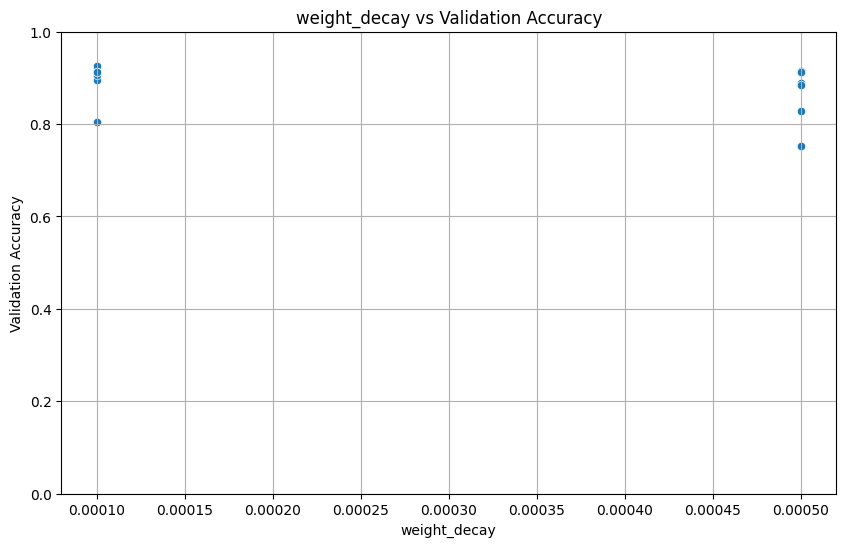

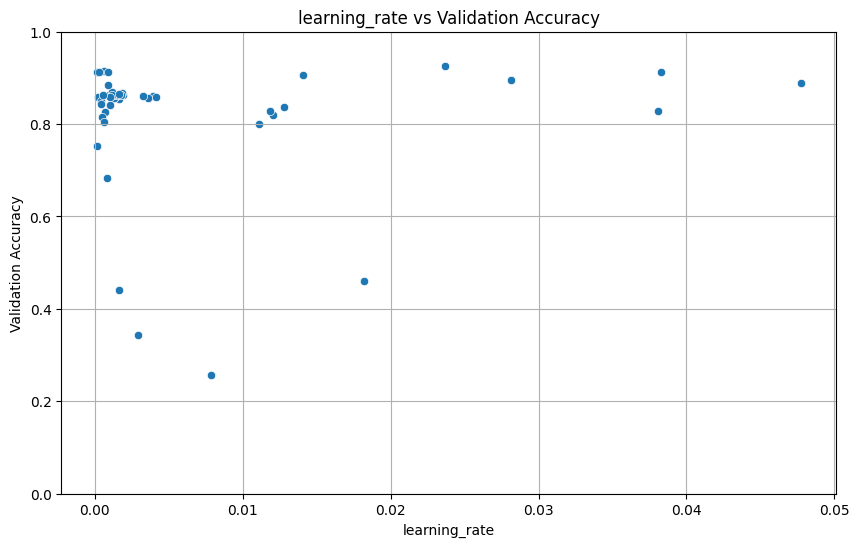

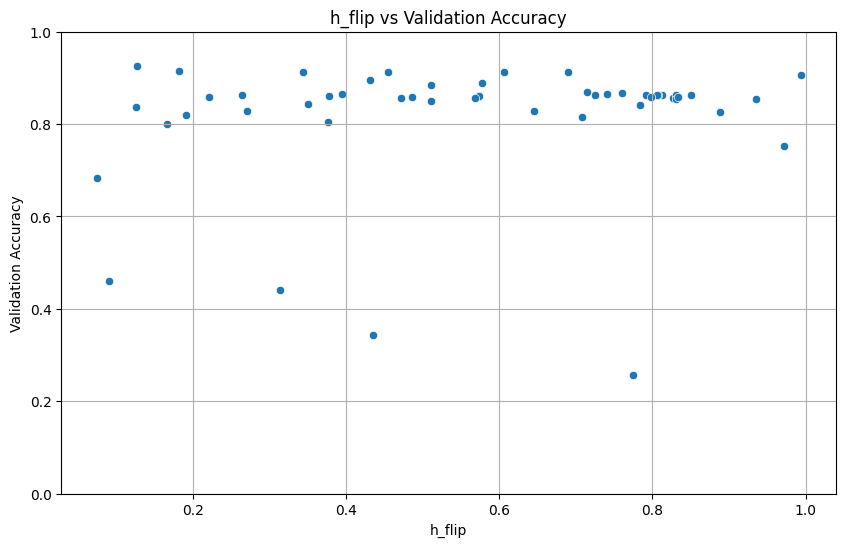

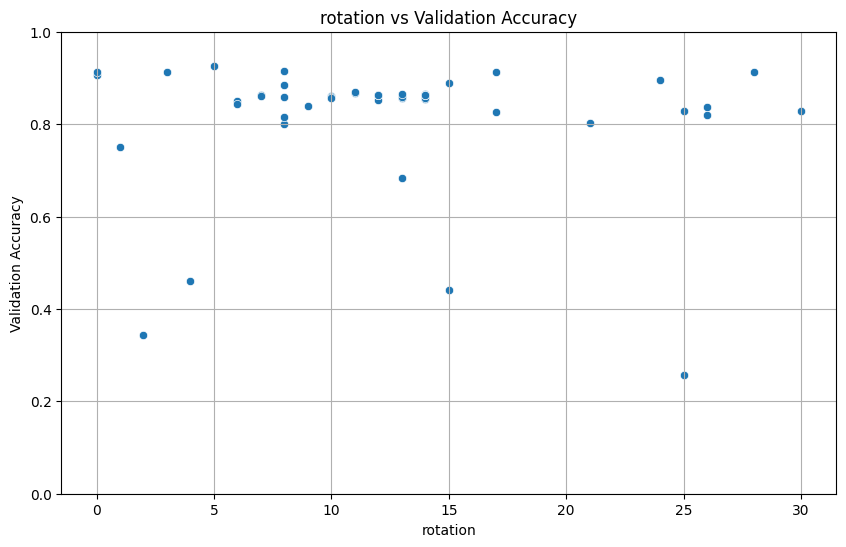

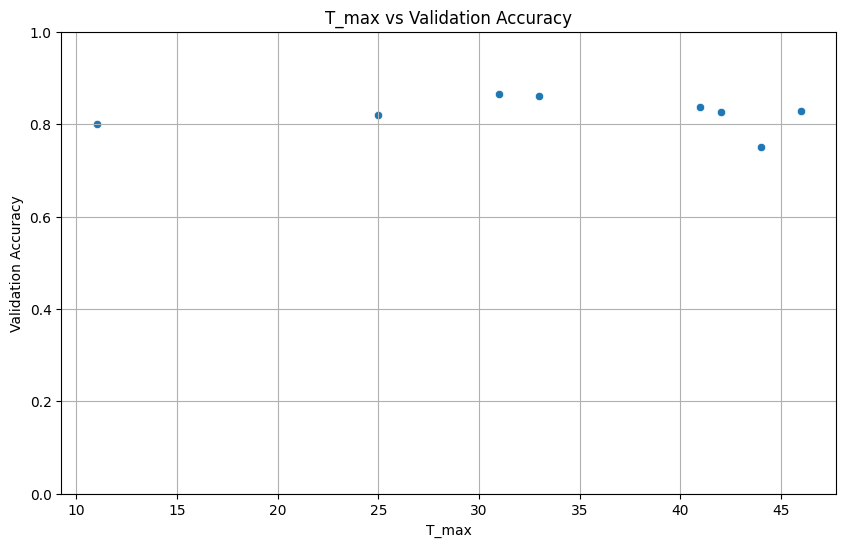

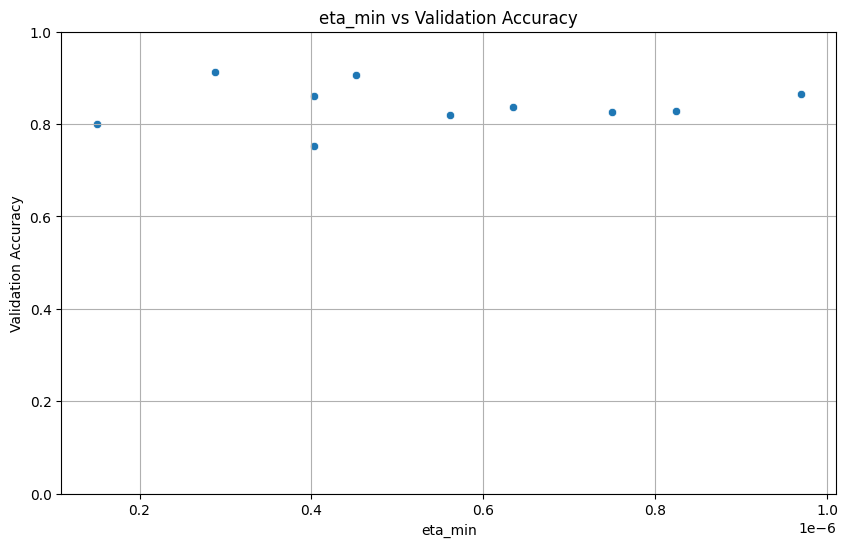

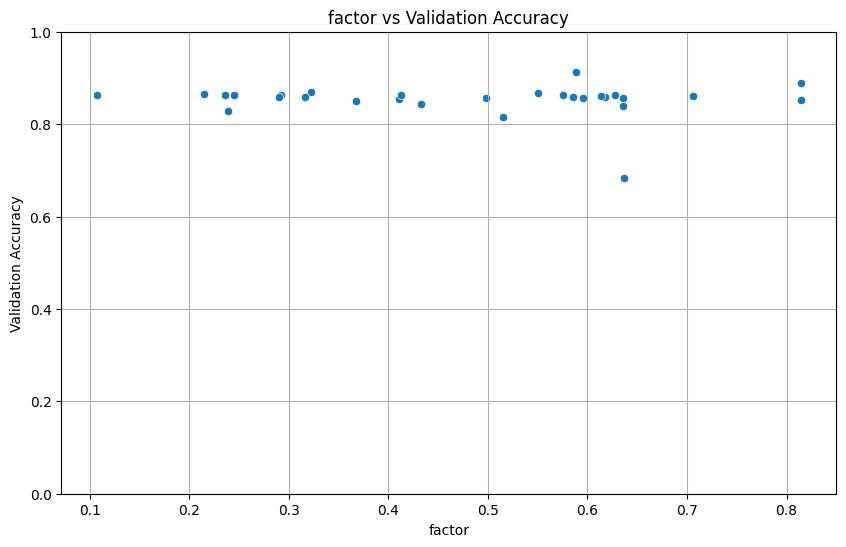

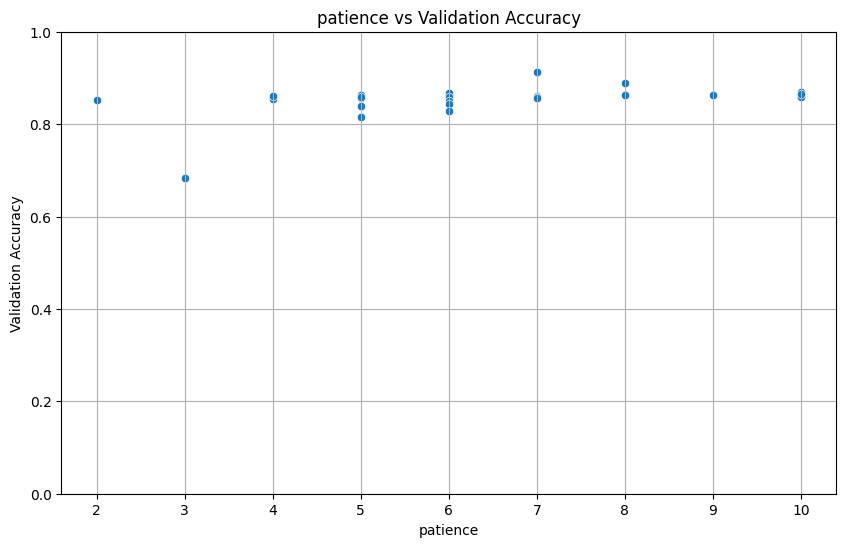

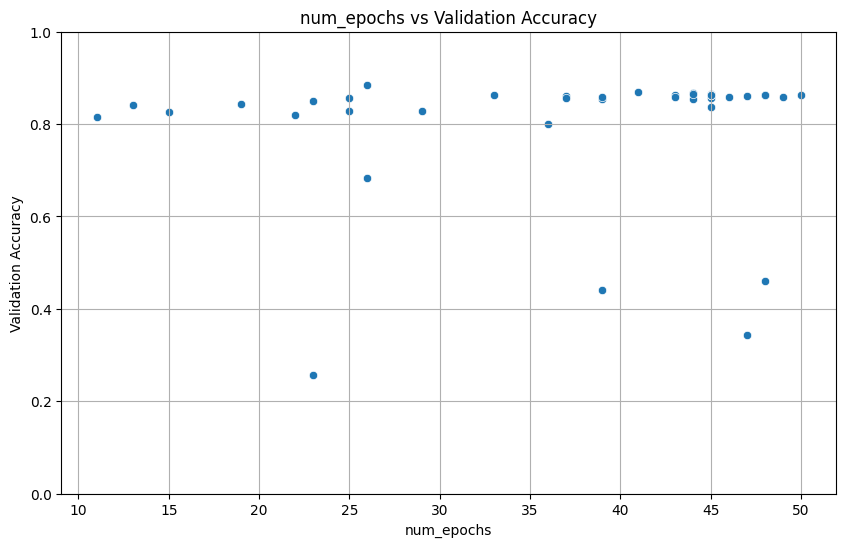

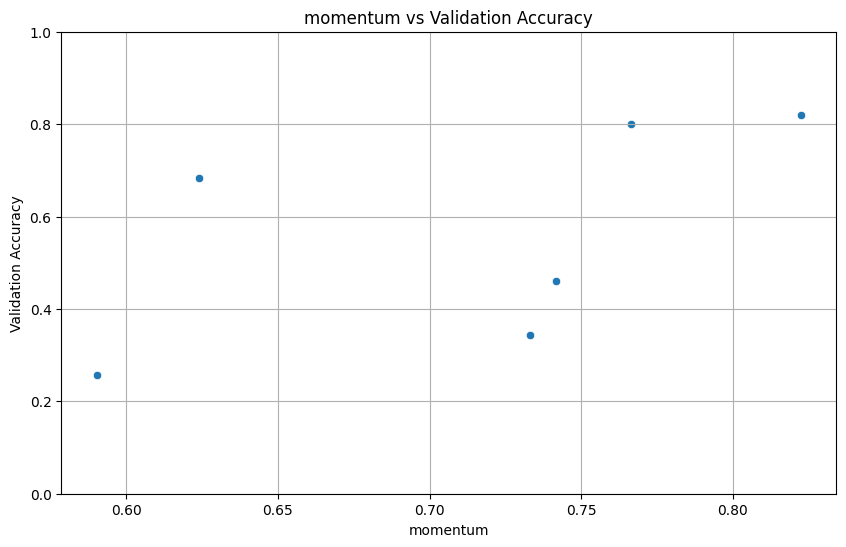

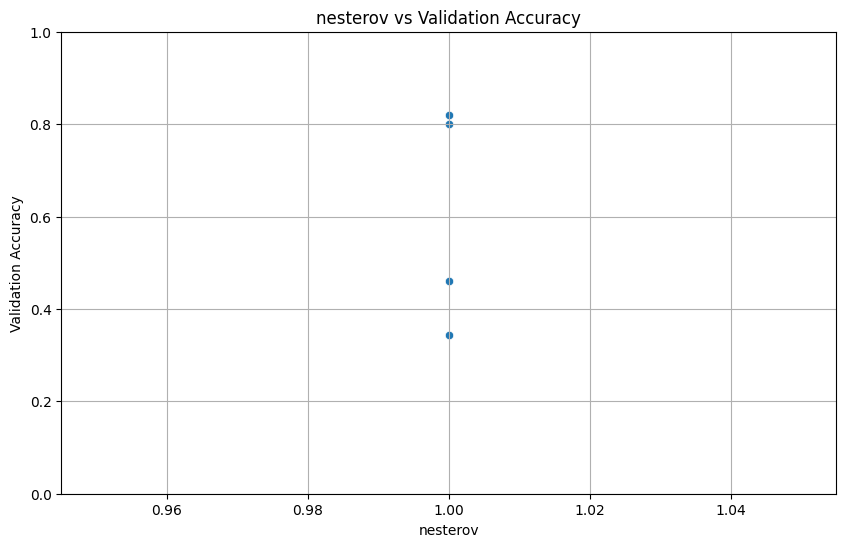

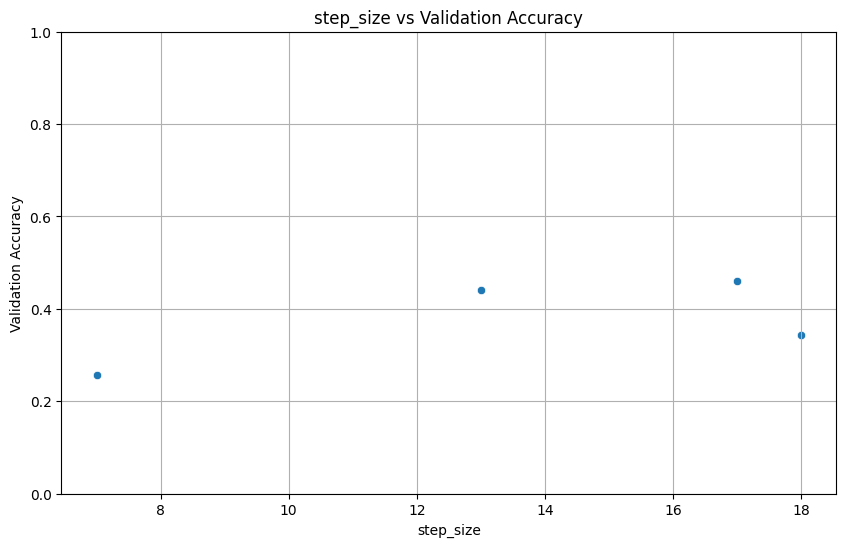

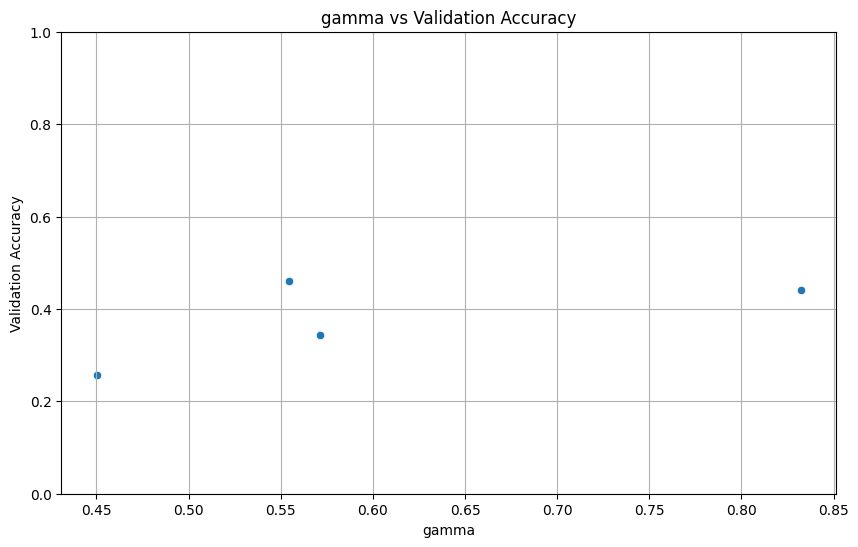

In [29]:
for param in df.columns.tolist():
    if param != "best_val_accuracy":
        plot_hyperparam_vs_acc(df, param)